<a href="https://colab.research.google.com/github/mkharray/Game-of-Thrones-Script-Analysis/blob/main/Game_of_Thrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px



In [2]:
df = pd.read_csv("/content/drive/MyDrive/game-of-thrones-dialogue.csv")

In [3]:
df.isnull().sum()

Text          0
Speaker    8356
Episode       0
Season        0
Show          0
dtype: int64

In [4]:
df[df['Speaker'].isna()]

,Text,Speaker,Episode,Season,Show
0,[First scene opens with three Rangers riding t...,NaN,e1-Winter is Coming,season-01,Game-of-Thrones
9,[GARED grumbles.],NaN,e1-Winter is Coming,season-01,Game-of-Thrones
12,"[WILL glares, but obeys. Sometime later, the t...",NaN,e1-Winter is Coming,season-01,Game-of-Thrones
16,"[The three look around, swords drawn. They hea...",NaN,e1-Winter is Coming,season-01,Game-of-Thrones
19,"[As he speaks, a CREATURE with glowing blue ey...",NaN,e1-Winter is Coming,season-01,Game-of-Thrones
...,...,...,...,...,...
33187,ARYA stands just behind the wolf figurehead of...,NaN,e6,season-08,Game-of-Thrones
33189,JON and TORMUND are mounted behind the gate th...,NaN,e6,season-08,Game-of-Thrones
33191,Someone places a braided crown onto SANSA's he...,NaN,e6,season-08,Game-of-Thrones
33195,ARYA stands at the prow and the ship sails awa...,NaN,e6,season-08,Game-of-Thrones


In [5]:
#Remove NULL values from the df
df = df.dropna(subset=['Speaker'])
df[df['Speaker'].isna()].value_counts()

Series([], Name: count, dtype: int64)

In [6]:
df.tail()

,Text,Speaker,Episode,Season,Show
33190,Winterfell,CUT TO,e6,season-08,Game-of-Thrones
33192,The Queen in the North!,MAN,e6,season-08,Game-of-Thrones
33193,The Queen in the North! The Queen in the Nort...,ALL,e6,season-08,Game-of-Thrones
33194,ARYA's ship,CUT TO,e6,season-08,Game-of-Thrones
33196,Castle Black,CUT TO,e6,season-08,Game-of-Thrones


In [7]:
df.head()

,Text,Speaker,Episode,Season,Show
1,What d’you expect? They’re savages. One lot s...,WAYMAR ROYCE,e1-Winter is Coming,season-01,Game-of-Thrones
2,I’ve never seen wildlings do a thing like thi...,WILL,e1-Winter is Coming,season-01,Game-of-Thrones
3,How close did you get?,WAYMAR ROYCE,e1-Winter is Coming,season-01,Game-of-Thrones
4,Close as any man would.,WILL,e1-Winter is Coming,season-01,Game-of-Thrones
5,We should head back to the wall.,GARED,e1-Winter is Coming,season-01,Game-of-Thrones


In [8]:
df.describe()


,Text,Speaker,Episode,Season,Show
count,24842,24842,24842,24842,24842
unique,22946,957,50,8,1
top,No.,TYRION,e4,season-02,Game-of-Thrones
freq,103,1543,1469,4199,24842


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24842 entries, 1 to 33196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     24842 non-null  object
 1   Speaker  24842 non-null  object
 2   Episode  24842 non-null  object
 3   Season   24842 non-null  object
 4   Show     24842 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [10]:
Speakers = df["Speaker"]
Speakers

1        WAYMAR ROYCE
2                WILL
3        WAYMAR ROYCE
4                WILL
5               GARED
             ...     
33190          CUT TO
33192             MAN
33193             ALL
33194          CUT TO
33196          CUT TO
Name: Speaker, Length: 24842, dtype: object

In [11]:
df = df.drop(df[df['Speaker'] == "CUT TO"].index)


<Axes: title={'center': 'Top 20 Characters with lines'}, xlabel='No. of Lines', ylabel='Character'>

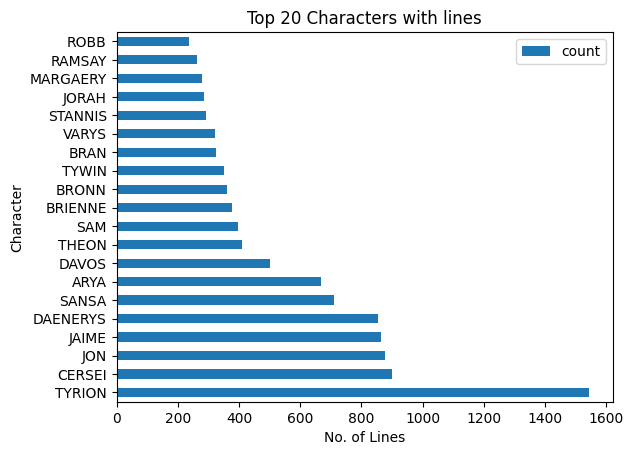

In [12]:
# @title Top 20 Most Talkative Characters
top_20 = df[['Speaker']].value_counts().head(20).reset_index()
top_20.plot(x='Speaker',kind='barh', title='Top 20 Characters with lines',
            xlabel='No. of Lines', ylabel='Character'
           )


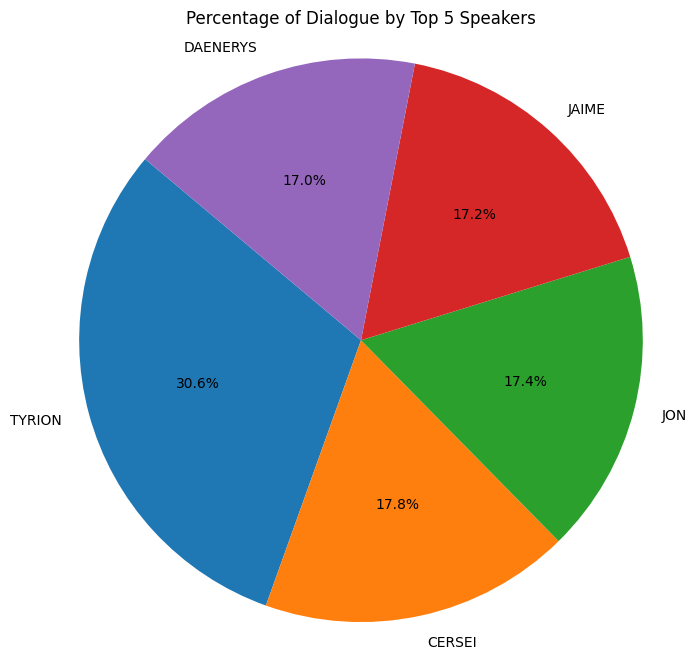

In [13]:
# @title Percentage of Dialogue by Top 5 Speakers

top_5 = top_20.head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_5['count'], labels=top_5['Speaker'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Dialogue by Top 5 Speakers')
plt.axis('equal')  # Equal aspect ratio = circle
plt.show()

In [14]:
# @title Dialogue per Season

seasons = df['Season'].value_counts().reset_index()
seasons.columns=['Season', 'Counts']
seasons.sort_values(by='Season', inplace=True)
px.bar(seasons, 'Season', 'Counts', title='Total dialougue counts per season.')

In [15]:
# @title Characters per season

character = df.groupby("Season")["Speaker"].nunique().reset_index()

# Rename columns for clarity
character.columns = ['Seasons', 'Characters']


# Create a bar plot using Plotly
fig = px.bar(character, x='Seasons', y='Characters', title='Characters per Season (Plotly)')
fig.show()